**余盈蓓；語碩二；110555009**\
**111-2 Computational Linguistics**
<p align="center", style = "font-size:18pt">
<b>5th Assignment<br>
Basic Neural Network</b>
</p>

<p style = "font-size:16pt", align="center">
<b>Sample Word-word Sequence Model</b>
</p>

<p style = "font-size:12pt">
✨製造資料
</p>

In [1]:
sample = """ Jack and Jill went up the hill\n
        To fetch a pail of water\n
        Jack fell down and broke his crown\n
        And Jill came tumbling after\n """

<p style = "font-size:12pt">
✨斷詞+編碼
</p>

In [1]:
from keras.preprocessing.text import Tokenizer

sample_tokenizer = Tokenizer()
sample_tokenizer.fit_on_texts([sample])
sample_encoded = sample_tokenizer.texts_to_sequences([sample])[0]

In [3]:
sample_vocab_size = len(sample_tokenizer.word_index) + 1
print('Vocabulary Size: %d' % sample_vocab_size)

Vocabulary Size: 22


<p style = "font-size:12pt">
✨製作bigram
</p>

In [4]:
sample_sequences = list()
for i in range(1, len(sample_encoded)): #因為window size是2，所以要從第二個開始
    sequence = sample_encoded[i-1:i+1]
    sample_sequences.append(sequence)
print('Total Sequences: %d' % len(sample_sequences))
print(sample_sequences)

Total Sequences: 24
[[2, 1], [1, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 2], [2, 14], [14, 15], [15, 1], [1, 16], [16, 17], [17, 18], [18, 1], [1, 3], [3, 19], [19, 20], [20, 21]]


<p style = "font-size:12pt">
✨轉換成array
</p>

In [5]:
import numpy as np

sample_sequences = np.array(sample_sequences)
sample_context_word, sample_next_word = sample_sequences[:,0],sample_sequences[:,1]
sample_context_word, sample_next_word

(array([ 2,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1,
        16, 17, 18,  1,  3, 19, 20]),
 array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1, 16,
        17, 18,  1,  3, 19, 20, 21]))

In [6]:
from keras.utils import to_categorical

sample_next_word = to_categorical(sample_next_word, num_classes=sample_vocab_size)

<p style = "font-size:12pt">
✨定義評估方式<br>
&emsp;&ensp;因為<code>keras</code>沒有提供recall, precision, 跟f-score計算的函式，所以要先定義新的功能。
</p>

In [7]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


<p style = "font-size:12pt">
✨初始化模型
</p>

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Reshape

sample_model = Sequential()  
sample_model.add(Embedding(sample_vocab_size, 10, input_length=1)) 
sample_model.add(Reshape((10,)))
sample_model.add(Dense(units=50, activation='relu')) 
sample_model.add(Dense(sample_vocab_size, activation='softmax')) 

sample_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc", f1_m])

print(sample_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             220       
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 22)                1122      
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
None


<p style = "font-size:12pt">
✨模型訓練
</p>

In [9]:
sample_model.fit(sample_context_word, sample_next_word, epochs=50, verbose=2)

Epoch 1/50
1/1 - 0s - loss: 3.0879 - acc: 0.1250 - f1_m: 0.0000e+00 - 485ms/epoch - 485ms/step
Epoch 2/50
1/1 - 0s - loss: 3.0852 - acc: 0.1667 - f1_m: 0.0000e+00 - 1ms/epoch - 1ms/step
Epoch 3/50
1/1 - 0s - loss: 3.0826 - acc: 0.1667 - f1_m: 0.0000e+00 - 1ms/epoch - 1ms/step
Epoch 4/50
1/1 - 0s - loss: 3.0800 - acc: 0.2500 - f1_m: 0.0000e+00 - 1ms/epoch - 1ms/step
Epoch 5/50
1/1 - 0s - loss: 3.0775 - acc: 0.2500 - f1_m: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 6/50
1/1 - 0s - loss: 3.0750 - acc: 0.2083 - f1_m: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 7/50
1/1 - 0s - loss: 3.0726 - acc: 0.2500 - f1_m: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 8/50
1/1 - 0s - loss: 3.0703 - acc: 0.2083 - f1_m: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 9/50
1/1 - 0s - loss: 3.0679 - acc: 0.2500 - f1_m: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 10/50
1/1 - 0s - loss: 3.0655 - acc: 0.2500 - f1_m: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 11/50
1/1 - 0s - loss: 3.0632 - acc: 0.2500 - f1_m: 0.0000e+00 - 2ms/epoch - 2m

<p style = "font-size:16pt", align="center">
<b>Chinese Word-word Sequence Model</b>
</p>

<p style = "font-size:12pt", align="center">
這週一樣用魯迅的小說來訓練模型。但考量到要訓練的是透過context預測下一個詞的模型，為了減少雜訊，會只用《吶喊》來訓練。
</p>

<p style = "font-size:14pt">
<b>Step 1. 資料前處理</b>
</p>

<p style = "font-size:12pt">
✨資料讀入
<p>

In [4]:
data = open("吶喊.txt").read()

<p style = "font-size:12pt">
✨清除區分章節的標籤
<p>

In [5]:
import re
clean_data = re.sub("-end-", "", data)

<p style = "font-size:12pt">
✨斷詞<br>
&emsp;&ensp;因為《吶喊》裡面有很多地方使用的是簡體字，且文風會比較接近北京華語的使用，所以這邊引進<code>jieba</code>來進行斷詞。
<p>

In [6]:
import jieba

tokens = jieba.lcut(clean_data)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\c5227\AppData\Local\Temp\jieba.cache
Loading model cost 0.387 seconds.
Prefix dict has been built successfully.


<p style = "font-size:12pt">
✨資料清理<br>
&emsp;&ensp;因為下面的word-word sequence model會用單一個context word來預測一個next word，如果存在標點符號的話可能會使雜訊過多，導致預測結果被標點符號占據，所以下面先把標點符號跟不必要的東西一起清掉。（其實是第一次訓練的時候發現超多都直接預測標點符號，模型整個爛掉才決定回來拿掉的。）
<p>

In [7]:
clean_tokens = []
for token in tokens:
    word = re.sub("，|。|？|「|」|＂|“|”|；|：|、|…|—|\n+|[A-z]+|\s+", " ", token)
    if len(word) != 0 and " "not in word:
        clean_tokens.append(word)

In [8]:
tokenized_data = " ".join(clean_tokens)
tokenized_data[0:50]

'我 從 鄉 下 跑 到 京城 裏 一轉眼 已經 六年 了 其間 耳聞 目睹 的 所謂 國家 大事 算'

<p style = "font-size:14pt">
<b>Step 2. 向量轉換</b>
</p>

<p style = "font-size:12pt">
✨編碼
<p>

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([tokenized_data])
encoded = tokenizer.texts_to_sequences([tokenized_data])[0]  # list within list

print(list(tokenizer.word_index)[0:10])

['的', '了', '他', '是', '我', '也', '在', '說', '裏', '有']


<p style = "font-size:12pt">
✨計算vocab size<br>
&emsp;&ensp;這裡要murmur一下。本來以為是因為padding之後會多一個pad的符號才需要+1的，結果發現完全不是這樣。因為上面編碼是從1開始，但等一下轉換成類別型資料的時候，python會從0開始到原本的vocab_size-1，等於會轉換不到最後一個編碼的字，所以才需要+1。為什麼我會知道呢？因為第一次跑的時候想說沒有padding就不用+1，結果在<code>to_categorical</code>的地方就出現error了呢=)
<p>

In [10]:
vocab_size = len(tokenizer.word_index)+1 

print("vocabulary size: " + str(vocab_size))

vocabulary size: 8759


<p style = "font-size:12pt">
✨製作bigram<br>
<p>

In [11]:
from nltk.util import bigrams

sequences = list(bigrams(encoded))
print(sequences[0:10])

[(5, 49), (49, 484), (484, 71), (71, 174), (174, 23), (23, 3172), (3172, 9), (9, 3173), (3173, 72), (72, 1864)]


In [12]:
sequences = np.array(sequences)
context_word, next_word = sequences[:,0],sequences[:,1]

print(context_word[0:10])
print(next_word[0:10])

[   5   49  484   71  174   23 3172    9 3173   72]
[  49  484   71  174   23 3172    9 3173   72 1864]


In [13]:
next_word_encoded = to_categorical(next_word, num_classes = vocab_size)

<p style = "font-size:14pt">
<b>Step 3. 模型訓練</b>
</p>

<p style = "font-size:12pt">
✨區分訓練集跟測試集
</p>

In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

shuffled_context_word, shuffled_next_word = shuffle(context_word, next_word_encoded, random_state = 168)
context_word_train, context_word_test, next_word_train, next_word_test = train_test_split(shuffled_context_word, shuffled_next_word, test_size = 0.2, random_state = 168)

<p style = "font-size:12pt">
✨初始化模型<br>
</p>

In [93]:
word_model = Sequential()  # initialize a sequence model
word_model.add(Embedding(vocab_size, 10, input_length=1))
word_model.add(Reshape((10,)))
word_model.add(Dense(units=50, activation='relu')) 
word_model.add(Dense(vocab_size, activation='softmax')) 

word_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m])

print(word_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1, 10)             87590     
                                                                 
 reshape_8 (Reshape)         (None, 10)                0         
                                                                 
 dense_16 (Dense)            (None, 50)                550       
                                                                 
 dense_17 (Dense)            (None, 8759)              446709    
                                                                 
Total params: 534,849
Trainable params: 534,849
Non-trainable params: 0
_________________________________________________________________
None


<p style = "font-size:12pt">
✨模型訓練
</p>

In [94]:
word_history = word_model.fit(context_word_train, next_word_train, epochs=200, verbose=2)

Epoch 1/200
974/974 - 6s - loss: 7.6662 - accuracy: 0.0629 - f1_m: 0.0000e+00 - 6s/epoch - 7ms/step
Epoch 2/200
974/974 - 6s - loss: 7.0858 - accuracy: 0.0632 - f1_m: 0.0000e+00 - 6s/epoch - 6ms/step
Epoch 3/200
974/974 - 11s - loss: 6.9381 - accuracy: 0.0661 - f1_m: 0.0021 - 11s/epoch - 11ms/step
Epoch 4/200
974/974 - 12s - loss: 6.7988 - accuracy: 0.0717 - f1_m: 0.0097 - 12s/epoch - 12ms/step
Epoch 5/200
974/974 - 11s - loss: 6.6423 - accuracy: 0.0787 - f1_m: 0.0178 - 11s/epoch - 12ms/step
Epoch 6/200
974/974 - 11s - loss: 6.4607 - accuracy: 0.0994 - f1_m: 0.0449 - 11s/epoch - 12ms/step
Epoch 7/200
974/974 - 11s - loss: 6.2590 - accuracy: 0.1229 - f1_m: 0.0741 - 11s/epoch - 12ms/step
Epoch 8/200
974/974 - 12s - loss: 6.0557 - accuracy: 0.1412 - f1_m: 0.0897 - 12s/epoch - 12ms/step
Epoch 9/200
974/974 - 12s - loss: 5.8577 - accuracy: 0.1540 - f1_m: 0.0991 - 12s/epoch - 12ms/step
Epoch 10/200
974/974 - 12s - loss: 5.6644 - accuracy: 0.1676 - f1_m: 0.1181 - 12s/epoch - 12ms/step
Epoch 1

<p style = "font-size:12pt">
✨圖像化訓練過程
</p>

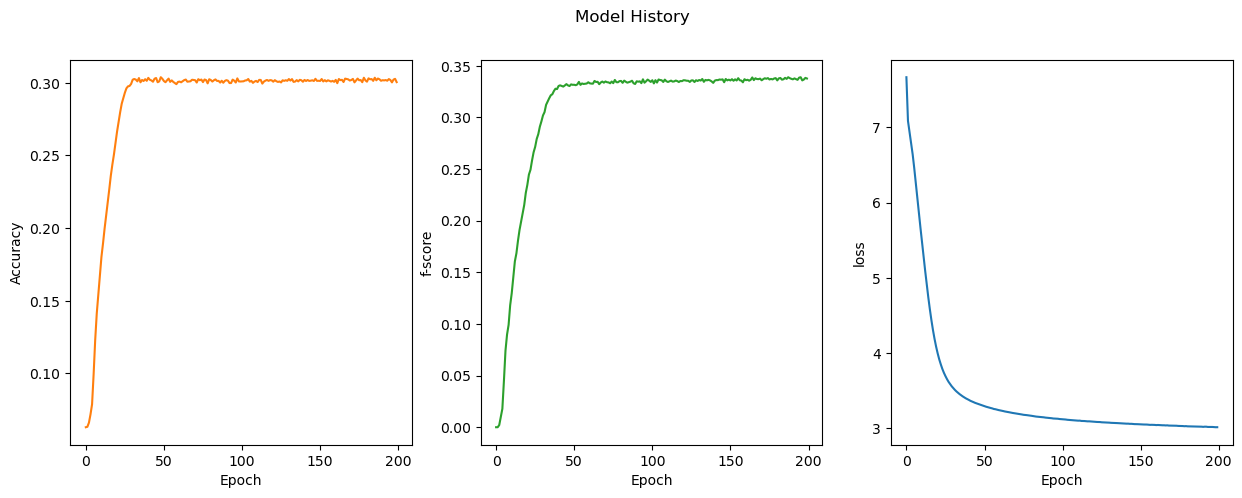

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(word_history.history['accuracy'], 'C1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(132)
plt.plot(word_history.history['f1_m'], 'C2')
plt.ylabel('f-score')
plt.xlabel('Epoch')
plt.subplot(133)
plt.plot(word_history.history['loss'], 'C0')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.suptitle('Model History')
plt.show()

<p style = "font-size:14pt">
<b>Step 4. 模型評估</b>
</p>

<p style = "font-size:12pt">
✨結果預測
</p>

In [96]:
word_prediction = np.argmax(word_model.predict(context_word_test), axis=-1)

244/244 [==============================] - 1s 3ms/step


<p style = "font-size:12pt">
✨結果評估
</p>

In [15]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def model_metrics(prediction, label, classes): # 定義一個新功能叫做model_metrics，裡面需要prediction跟label兩個參數。然後作下面這然後做下面這些事情
    
    evaluation = precision_recall_fscore_support(label, prediction, average='micro', labels=classes) # 計算precision, recall, F-score
    accuracy = accuracy_score(label, prediction) # 計算accuracy

    # 印出評估結果
    print("accuracy: " + str(round(accuracy, 2)) + "\nprecision: " + str(round(evaluation[0], 2)) + "\nrecall: " + str(round(evaluation[1], 2)) + "\nfscore: " + str(round(evaluation[2],2)))

In [97]:
model_metrics(word_prediction, np.argmax(next_word_test, axis=-1), range(vocab_size))

accuracy: 0.1
precision: 0.1
recall: 0.1
fscore: 0.1


<p style = "font-size:12pt">
&emsp;&ensp;因為全部印出來太多了，下面只印20筆出來。格式是<b>語境 預測結果 | 正確答案</b>
</p>

In [98]:
word_list = list(tokenizer.word_index.keys())

for i in range(20):
    context = word_list[context_word_test[i]-1]
    predicted = word_list[word_prediction[i]-1]
    correct = word_list[np.argmax(next_word_test, axis=-1)[i]-1]
    print(context + " " + predicted + " | " + correct)

西關 服怨 | 外
正是 一個 | 向
他 的 | 說
人 的 | 是
都 是 | 驚服
堆外 服怨 | 站
又 都 | 來
殺 了 | 掉
得 他 | 外面
有 了 | 影像
一樣 ！ | 的
船底 服怨 | 潺潺
五虎 服怨 | 將
你 的 | 的
溫酒 做工 | 的
來 的 | 了
腰間 說 | 還掛
下午 他 | 我
還膽怯 服怨 | 獨有
駡 的 | 或


<p align = "center", style = "font-size:16pt">
    🧐<b>討論</b>🧐<br>
</p>
<p style = "font-size:12pt">
   &emsp;&emsp;從模型訓練過程畫出的圖可以發現，它在大概第30~40個epoch就已經收斂了，基本上f-score最多只能在0.3左右徘徊。這可能跟資料其實不大有關。<br>
   &emsp;&emsp;預測完結果並計算f-score之後發現結果真的滿差的（0.14）。推測會這樣的原因可能如下。在使用bigram訓練資料的情況下，我們獲得的context其實不太夠。同樣一個詞後面能接的詞也不只一個，只是剛好在我們用來測試的資料後面不接預測出來的詞並不代表平常也不能接，尤其是在只有一個context word的情況下。也就是說現在的結果評估方式可能不太適合這個任務，如果訓練line-line sequence的模型可能會比較適合這樣的評估方法，也可以得到較好的結果。（BTW 發現清資料的時候忘記把驚嘆號拿掉了，但是跑200個epoch真的好久，請原諒我沒有重新處理TT）
</p>

<p style = "font-size:16pt", align="center">
<b>Neural Language Model with <code>tflearn</code></b>
</p>

<p style = "font-size:12pt">
✨引進套件
</p>

In [16]:
import tensorflow as tf
import tflearn

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


<p style = "font-size:12pt">
✨初始化模型
</p>

In [17]:
tf.compat.v1.reset_default_graph()
net = tflearn.input_data([None, vocab_size], name='input')
net = tflearn.embedding(net, input_dim=vocab_size, output_dim=10,
                        trainable=False)
net = tflearn.fully_connected(net, 50, activation='Relu')
net = tflearn.fully_connected(net, vocab_size, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.01,
                         loss='categorical_crossentropy', name='target')
model_16 = tflearn.DNN(net)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<p style = "font-size:12pt">
✨模型訓練
</p>

In [28]:
model_16.fit(to_categorical(context_word_train, num_classes = vocab_size, dtype="uint8"), next_word_train.astype(np.uint8), validation_set=(to_categorical(context_word_test, num_classes = vocab_size, dtype="uint8"), next_word_test.astype(np.uint8)), show_metric=True,
           batch_size=16, n_epoch=50)

Training Step: 97399  | total loss: 7.18412 | time: 42.842s
| Adam | epoch: 050 | loss: 7.18412 - acc: 0.0491 -- iter: 31152/31164
Training Step: 97400  | total loss: 7.13851 | time: 46.249s
| Adam | epoch: 050 | loss: 7.13851 - acc: 0.0630 | val_loss: 9.22914 - val_acc: 0.0666 -- iter: 31164/31164
--


In [19]:
model_32 = tflearn.DNN(net)
model_32.fit(to_categorical(context_word_train, num_classes = vocab_size, dtype="uint8"), next_word_train.astype(np.uint8), validation_set=(to_categorical(context_word_test, num_classes = vocab_size, dtype="uint8"), next_word_test.astype(np.uint8)), show_metric=True,
           batch_size=32, n_epoch=50)

Training Step: 48699  | time: 33.300s
| Adam | epoch: 050 | loss: 0.00000 - acc: 0.0000 -- iter: 31136/31164
Training Step: 48700  | time: 37.165s
| Adam | epoch: 050 | loss: 0.00000 - acc: 0.0000 | val_loss: 9.23189 - val_acc: 0.0666 -- iter: 31164/31164
--


<p style = "font-size:12pt">
✨結果預測
</p>

In [31]:
prediction_16 = np.argmax(model_16.predict(to_categorical(context_word_test, num_classes = vocab_size, dtype="uint8")), axis = -1)

In [20]:
prediction_32 = np.argmax(model_32.predict(to_categorical(context_word_test, num_classes = vocab_size, dtype="uint8")), axis = -1)

<p style = "font-size:12pt">
✨結果評估
</p>

In [34]:
model_metrics(prediction_16, np.argmax(next_word_test, axis=1), range(vocab_size))

accuracy: 0.07
precision: 0.07
recall: 0.07
fscore: 0.07


In [21]:
model_metrics(prediction_32, np.argmax(next_word_test, axis=-1), range(vocab_size))

accuracy: 0.07
precision: 0.07
recall: 0.07
fscore: 0.07


In [36]:
for i in range(20):
    context = word_list[context_word_test[i]-1]
    predicted = word_list[prediction_16[i]-1]
    correct = word_list[np.argmax(next_word_test, axis=-1)[i]-1]
    print(context + " " + predicted + " | " + correct)

西關 的 | 外
正是 的 | 向
他 的 | 說
人 的 | 是
都 的 | 驚服
堆外 的 | 站
又 的 | 來
殺 的 | 掉
得 的 | 外面
有 的 | 影像
一樣 的 | 的
船底 的 | 潺潺
五虎 的 | 將
你 的 | 的
溫酒 的 | 的
來 的 | 了
腰間 的 | 還掛
下午 的 | 我
還膽怯 的 | 獨有
駡 的 | 或


In [23]:
for i in range(20):
    context = word_list[context_word_test[i]-1]
    predicted = word_list[prediction_32[i]-1]
    correct = word_list[np.argmax(next_word_test, axis=-1)[i]-1]
    print(context + " " + predicted + " | " + correct)

西關 的 | 外
正是 的 | 向
他 的 | 說
人 的 | 是
都 的 | 驚服
堆外 的 | 站
又 的 | 來
殺 的 | 掉
得 的 | 外面
有 的 | 影像
一樣 的 | 的
船底 的 | 潺潺
五虎 的 | 將
你 的 | 的
溫酒 的 | 的
來 的 | 了
腰間 的 | 還掛
下午 的 | 我
還膽怯 的 | 獨有
駡 的 | 或


<p align = "center", style = "font-size:16pt">
    🧐<b>討論</b>🧐<br>
</p>
<p style = "font-size:12pt">
   &emsp;&emsp;本來期待換batch size可以達到不一樣的效果，但看起來模型是壞掉了，不知道為什麼每個都預測「的」。這裡可能的原因是「的」作為頻率很高的停止詞卻沒有被拿掉的關係。但是這個現象在剛剛用<code>keras</code>訓練的模型卻沒有發生。不知道是我的程式碼有問題還是他的算法就是比較沒辦法避免這樣的情況。
   &emsp;&emsp;話又說回來，因為<code>tflearn</code>在訓練模型的時候，特徵跟答案都要是categorical的型態，所以我一開始是用跟上面一樣的方法轉換。結果電腦整個死掉（連網路都卡住的那種死掉）還跑出OOM的error，整個嚇死。後來才發現有<b>uint8</b>這種資料型態可以節省空間，也算是學到了新東西。（雖然驚嚇還是比較多的）
</p>